In [1]:
from sklearn.datasets import fetch_lfw_people

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore")

In [3]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


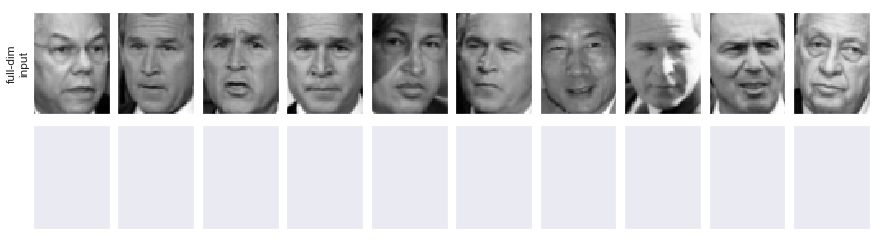

In [4]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(15,4),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[0, 0].set_ylabel('full-dim\ninput')

In [5]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
pca.components_.shape

(1348, 2914)

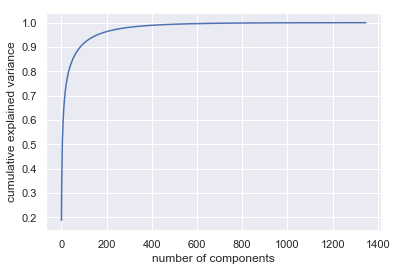

In [7]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [33]:
# Compute the components and projected faces
pca = PCA(154).fit(faces.data)
components = pca.transform(faces.data)
print(pca.components_.shape)
projected = pca.inverse_transform(components)

(154, 2914)


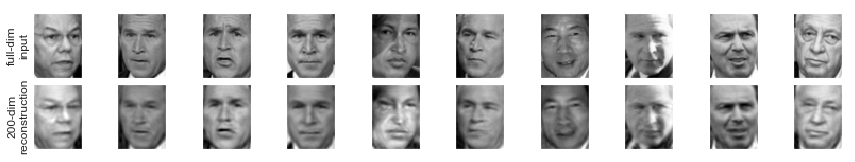

In [34]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(15, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('200-dim\nreconstruction');

In [24]:
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split(
    faces.data, faces.target, test_size=1/7.0, random_state=0)

In [25]:
benchmark_cols = ['Variance retained','n_Components','Time(s)','Accuracy_percentage']
benchmark = pd.DataFrame(columns = benchmark_cols)

In [26]:
benchmark

,Variance retained,n_Components,Time(s),Accuracy_percentage


In [27]:
variance = 1.0
n_components = train_img.shape[0]

logisticRegr = LogisticRegression(solver = 'lbfgs')
start = time.time()
logisticRegr.fit(train_img, train_lbl)
end =  time.time()
timing = end-start
# Predict for Multiple Observations (images) at Once
predicted = logisticRegr.predict(test_img)
# generate evaluation metrics
accuracy = (metrics.accuracy_score(test_lbl, predicted))

a = dict(zip(benchmark_cols,[variance,n_components,timing,accuracy]))
benchmark = benchmark.append(a,ignore_index=True)

print(benchmark)

   Variance retained  n_Components   Time(s)  Accuracy_percentage
0                1.0        1155.0  4.266887             0.792746


In [28]:
def benchmark_pca(variance,train_img,train_lbl,test_img,test_lbl):
    global benchmark
    print(train_img.shape)
    pca = PCA(variance)
    pca.fit(train_img)
    n_components = pca.n_components_
    train_img = pca.transform(train_img)

  
    test_img = pca.transform(test_img)
    logisticRegr = LogisticRegression(solver = 'lbfgs')
    start = time.time()
    logisticRegr.fit(train_img, train_lbl)
    end =  time.time()
 
    timing = end-start   

    # Predict for Multiple Observations (images) at Once
    predicted = logisticRegr.predict(test_img)   

    # generate evaluation metrics
    accuracy = (metrics.accuracy_score(test_lbl, predicted))
    #return 
    a = dict(zip(benchmark_cols,[variance,n_components,timing,accuracy]))
    benchmark = benchmark.append(a,ignore_index=True)

In [30]:
variance_list = [0.95,0.90,0.85,0.80,0.75,0.70]

In [31]:
for variance in variance_list:
    benchmark_pca(variance,train_img,train_lbl,test_img,test_lbl)

(1155, 2914)
(1155, 2914)
(1155, 2914)
(1155, 2914)
(1155, 2914)
(1155, 2914)


In [32]:
benchmark

,Variance retained,n_Components,Time(s),Accuracy_percentage
0,1.00,1155.0,4.266887,0.792746
1,0.95,154.0,0.357829,0.751295
2,0.90,82.0,0.251902,0.772021
3,0.85,50.0,0.247879,0.766839
4,0.80,32.0,0.177006,0.704663
5,0.75,22.0,0.157416,0.590674
6,0.70,16.0,0.119148,0.580311
